In [1]:
import sys,os
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
from IPython.display import clear_output
import time
baile_path=os.path.abspath(os.path.join("..","src"))
test_path=os.path.abspath(os.path.join("..","test"))
if not baile_path in sys.path:
    sys.path.append(baile_path)
if not test_path in sys.path:
    sys.path.append(test_path)
import SimpleSearch as ss
from test_simple_search import successor8Puzzle,goal8Puzzle

In [2]:
start=ss.node(((0,8,4),(1,3,2),(6,5,7)),op="start")
final=ss.node(((1,2,3),(4,5,6),(7,8,0)),op="final")
bfs=ss.BlindSearch(start,successor8Puzzle,goal8Puzzle,goal_state=final,strategy="bfs")
result=bfs.find()

finished in 139428 iterations
Se acabaron los estados: 15922


In [6]:
l=result.getPath()

In [7]:
def genAnnotations(z):
    x,y=[0,1,2],[0,1,2]
    annotations = go.Annotations()
    for n, row in enumerate(z):
        for m, val in enumerate(row):
            annotations.append(go.layout.Annotation(text= z[n][m] and str(z[n][m]) or "", x=x[m], y=y[n],
                                                font={'color':'green','size':80}, xref='x1', yref='y1', 
                                                    showarrow=False))
    return annotations
def genFrames(path):
    frames,steps=[],[]
    x,y=[0,1,2],[0,1,2]
    for item in path:
        z=list(item[0])
        z.reverse()
        ann=genAnnotations(z)
        name=item[2]
        hm=go.Heatmap(z=np.array(z),showscale=False,x=x,y=y,colorscale='magma',ygap=5,xgap=5)
        layout=go.Layout(annotations=ann,xaxis=dict(showticklabels=False),
                         yaxis=dict(showticklabels=False),height=700, width=600)
        frames.append(go.Frame(data=[hm], layout=layout, name=name))  
        steps.append({"args": [[name], {"frame": {"duration": 300, "redraw": True}, "mode": "immediate",
                                        "transition": {"duration": 300}}],
                      "label": name,"method": "animate"})  
    return frames,steps

def animacion(path):
    x,y=[0,1,2],[0,1,2]
    frames,steps=genFrames(path)
    st=list(path[0][0])
    st.reverse()
    ann=genAnnotations(st)
    #menus=[dict(type="buttons",buttons=[dict(label="Play",method="animate",args=[None])],direction='left',
    #          x=0.1,y=0, xanchor= "right", yanchor="top")]
    sliders= { "active": 0, "yanchor": "top","xanchor": "left",
              "currentvalue": {"font": {"size": 20}, "prefix": "Step:","visible": True,"xanchor": "right"},
              "transition": {"duration": 300, "easing": "cubic-in-out"},"pad": {"b": 10, "t": 50},
              "len": 0.9,"x": 0.1,"y": 0,"steps": []}
    sliders['steps']=steps
    layout=go.Layout(annotations=ann,xaxis=dict(showticklabels=False),sliders=[sliders],
                         yaxis=dict(showticklabels=False),height=700, width=600)
    fig = go.Figure(data=go.Heatmap(z=np.array(st),showscale=False,x=x,y=y,
                                    colorscale='magma',ygap=5,xgap=5),
                    frames=frames,layout=layout)
    return fig

/home/rock/baile/test/baile/lib/python3.12/site-packages/plotly/graph_objs/_deprecations.py:62: DeprecationWarning:

plotly.graph_objs.Annotations is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




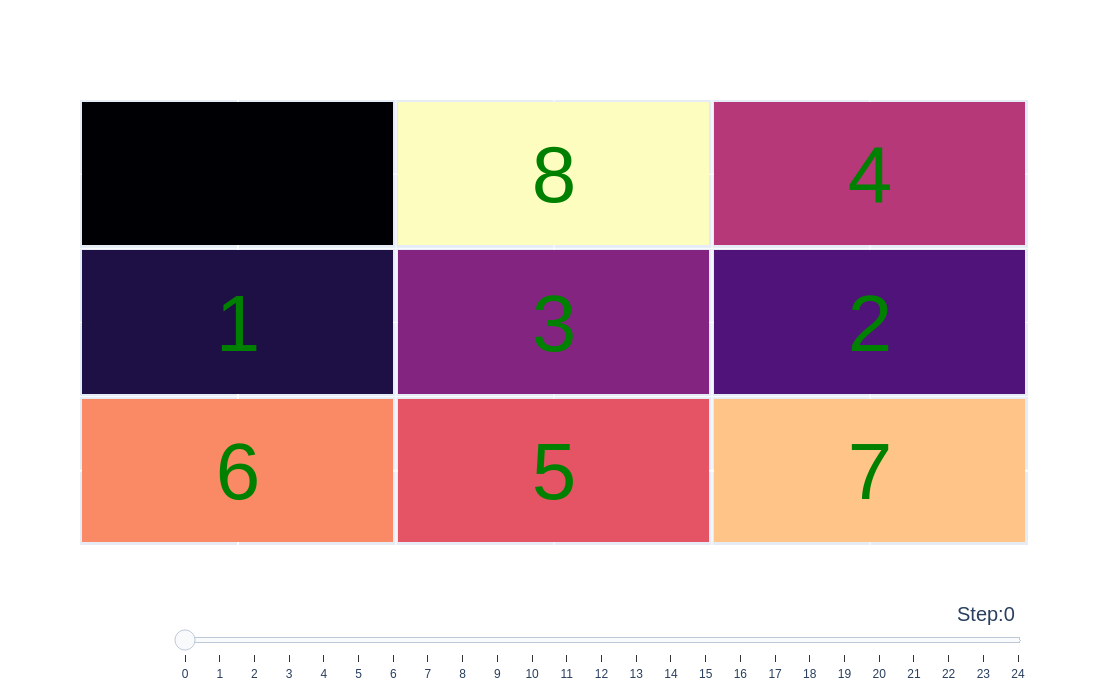

In [8]:
fig=animacion(l);
fig.show()

In [ ]:
while True:
    iplot(fig)
    time.sleep(600*len(l)//1000)
    clear_output(wait=True)

In [23]:
ff=go.Figure(data=go.Heatmap(z=np.random.rand(10,10)))
ff.show()

In [11]:
z=np.ones((3,3))

In [12]:
z

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[0.50227334, 0.0313397 , 0.0142301 , 0.4787936 , 0.27233995,
        0.29185771, 0.48696601, 0.68009418, 0.43742941, 0.85711122],
       [0.91301893, 0.57450835, 0.03291605, 0.01477213, 0.99900337,
        0.62229891, 0.62208617, 0.20906988, 0.541211  , 0.1703626 ],
       [0.9485094 , 0.03144103, 0.68416597, 0.46401511, 0.50596136,
        0.71162154, 0.46825252, 0.65719398, 0.5047608 , 0.6159745 ],
       [0.45614028, 0.55351297, 0.80242372, 0.69292745, 0.04312804,
        0.81394173, 0.10623061, 0.2742972 , 0.40457015, 0.65971217],
       [0.58062384, 0.46866731, 0.56897748, 0.63991772, 0.62942172,
        0.99547029, 0.93308674, 0.25478168, 0.92322909, 0.32022943],
       [0.59577859, 0.57190968, 0.80403771, 0.79662466, 0.51626015,
        0.27014784, 0.06487078, 0.05794334, 0.90739624, 0.84501238],
       [0.76985867, 0.18169221, 0.302467  , 0.51124755, 0.94376583,
        0.66054304, 0.86995125, 0.44486616, 0.6628117 , 0.09661586],
       [0.77386252, 0.86883926, 0.4901647